# 线性模型

线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，如预测房屋价格、气温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概念和技术同样适用于大多数的深度学习模型。我们首先以线性回归为例，介绍大多数深度学习模型的基本要素和表示方法。

## 1. 基本形式
给定由d个属性描述的示例$\mathbf{x}=(x_1;x_2;...;x_d)$，其中$x_i$是$x$在第i个属性上的取值，线性模型试图学得通过属性的线性组合来进行预测的函数，即
$$f(\mathbf{x})=\omega_1x_1 + \omega_2x_2+...+\omega_dx_d+b,$$
一般用向量形式写出
$$f(\mathbf{x})=\mathbf{\omega^Tx}+b,$$
其中$\mathbf{\omega}=(\omega_1;\omega_2;...;\omega_d)$. $\mathbf{\omega}$和b学得后，模型就确定了.

## 2.线性回归
给定数据集$D=\{(\mathbf{x_1},y_1),(\mathbf{x_2},y_2),...,(\mathbf{x_m},y_m)\}$，其中$\mathbf{x_i}=(x_{i1};x_{i2};...;x_{id}),y_i\in R$. 线性回归试图学得一个线性模型以尽可能准确地预测实数值输出标记. 我们试图学得
$$f(\mathbf{x_i})=\mathbf{x_i}+b,使得f(x_i)\simeq y_i,$$
这称为“多元线性回归”(multivariate linear regression).
可以利用最小二乘法对$\mathbf{\omega}$和b进行估计。假定$\mathbf{\hat \omega}=(\mathbf{\omega};b)$，相应地
$$
\mathbf{X} =
\begin{pmatrix}
    x_{11} & x_{12} & ... & x_{1d} & 1 \\
    x_{21} & x_{22} & ... & x_{2d} & 1 \\
    ... \\
    x_{m1} & x_{m2} & ... & x_{md} & 1
\end{pmatrix} = 
\begin{pmatrix}
    \mathbf{x_1^T} & 1 \\
    \mathbf{x_2^T} & 1 \\
    ... \\
    \mathbf{x_m^T} & 1
\end{pmatrix}, \mathbf{y}=
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_m
\end{pmatrix}=(y_1;y_2;...;y_m)
$$

如何确定$\mathbf{\hat\omega}$呢？关键在于衡量$f(\mathbf{x})$和$y$的差别。均方误是回归任务中最常用的性能衡量指标，因此我们可以试图让均方误差最小化.
$$
\mathbf{\hat\omega^*}=\operatorname*{argmin}_{\mathbf{\hat\omega}}\mathbf{(y-X\hat\omega)^T(y-X\hat\omega)}.
$$
令$E_{\mathbf{\hat\omega}}=\mathbf{(y-X\hat\omega)^T(y-X\hat\omega)}$，对$\mathbf{\hat\omega}$求导可得
$$
\cfrac{\partial E_{\hat{w}}}{\partial \hat{w}}=2\mathbf{X}^T(\mathbf{X}\hat{w}-\mathbf{y}).
$$
令上式为0可得$\mathbf{\hat\omega}$最优解的封闭解。

当$\mathbf{X^t X}$为满秩矩阵或正定矩阵时，令$\cfrac{\partial E_{\hat{w}}}{\partial \hat{w}}=0$可得
$$
\mathbf{\hat\omega^*=(X^TX)^{-1}X^Ty},
$$
其中$\mathbf{(X^TX)^{-1}}$是$(X^TX)$的逆矩阵. 令$\mathbf{\hat x_i} = (\mathbf{x_i}; 1)$，则最终学得的线性回归模型为
$$
f(\mathrm{\hat x_i})=\mathbf{\hat x_i^T(X^TX)^{-1}X^y}.
$$

然而，现实任务中$\mathbf{X^t X}$往往不是满秩矩阵，而且随着数据量的增加，计算量呈现大幅增长。因此，往往救助于优化算法迭代求解。

In [2]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from IPython import display
import numpy as np
import torch
import matplotlib.pyplot as plt

$y=\alpha + \beta X$

根据披萨的尺寸预测价格

In [6]:
X = np.array([[6], [8], [10], [14], [18]]) # X为训练数据的特征，即直径

In [23]:
y = np.array([7, 9, 13, 17.5, 18])  # 披萨价格

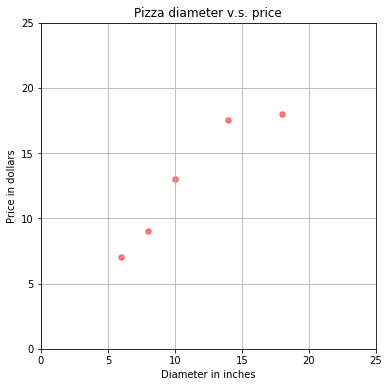

In [61]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Pizza diameter v.s. price")
ax.set_xlabel("Diameter in inches")
ax.set_ylabel("Price in dollars")
ax.scatter(X, y, s=30, alpha=0.5, c="red")
ax.axis([0, 25, 0, 25])
ax.grid(True)

## 3. 利用`sciki-learn`实现线性回归模型

In [43]:
model = LinearRegression(fit_intercept=True, normalize=True)  # 创建一个估计器实例

In [53]:
model.fit(X, y)  # 利用数据拟合模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [50]:
model.get_params()  # 模型设置的参数

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [54]:
print(f"拟合参数估计值: {model.coef_}\n截距项值:{model.intercept_}")

拟合参数估计值: [0.9762931]
截距项值:1.9655172413793078


In [56]:
r2 = model.score(X, y)  # 模型的r2
print(f"R2: {r2: .4f}")

R2:  0.9100


预测值

In [46]:
test_pizza = np.array([[12], [18], [20], [21]])
predicted_price = model.predict(test_pizza)

In [47]:
predicted_price

array([13.68103448, 19.5387931 , 21.49137931, 22.46767241])

计算指标

$\mathrm{SS_{res}}=\sum_{i=1}^{n}(y_i - f(x_i))^2$

$\beta = \frac{cov(x, y)}{var(x)}, \alpha = \bar y - \beta \bar x$

In [60]:
rse = np.mean((model.predict(X) - y)**2)
print(f"Residual of sum of squares: {rse:.2f}")

Residual of sum of squares: 1.75


## 二、基于小批量随机梯度下降实现多元线性回归

在求数值解的优化算法中，小批量随机梯度下降(`mini-batch stochastic gradient descent`)在深度学习中被广泛使用。
它的算法很简单:
- 先选取一组模型参数的初始值，如随机选取;
- 接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。

In [235]:
from IPython import display
import random

In [277]:
def linearModel(X: torch.tensor, w: torch.tensor, b:torch.tensor)-> torch.tensor:
    return X@w + b

In [278]:
def meanSquaredLoss(X: torch.tensor, y: torch.tensor, w: torch.tensor, b:torch.tensor) -> torch.tensor:
    """
    y: 标签
    """
    hat_y = linearModel(X, w, b)
    sLoss = (hat_y - y.reshape(hat_y.shape)) ** 2 / 2
    return sLoss.mean()

In [232]:
def stocGradDesc(params: torch.tensor, lr: torch.tensor, batch_size: torch.tensor):
    """
    stochastic gradient descent (SGD)
    params: 参数
    lr: 学习率
    batch_size: 抽样规模
    """
    for param in params:
        param.data.sub_(lr * param.grad/batch_size)  # 原地操作，结果等价于 param -= lr * param.grad / batch_size
        param.grad.data.zero_()

In [229]:
# 随机选取batch_size数量的数据
def sampleData(batch_size, features, labels):
    """
    随机打乱样本次序，然后依次取出batch_size的features, labels作为训练集
    """
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [314]:
# 生成数据
true_w = torch.tensor([2, -3.4])  # 真实w
num_inputs = true_w.numel()  # 权重数量
num_examples = 1000  # 样本数量
true_b = 4.2  # 真实截距
features = torch.randn(num_examples, num_inputs)  # 随机生成特征
labels = linearModel(features, true_w, true_b) + torch.randn(num_examples) * 0.01  # 按照标签

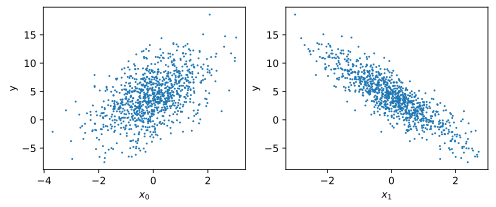

In [315]:
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (8, 3)
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel("$x_0$")
ax1.set_ylabel("y")
ax1.scatter(features[:, 0].numpy(), labels.numpy(), s=1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("y")
ax2.scatter(features[:, 1].numpy(), labels.numpy(), s=1);

In [316]:
# 初始化参数
w = torch.randn(num_inputs, 1) * 0.01
b = torch.zeros(1)
w.requires_grad_(True)
b.requires_grad_(True)

# 设置训练参数
lr = 0.03  # Learning rate
num_epochs = 10  # 一共训练次数
batch_size = 10  # 小样本的数量

for epoch in range(num_epochs):
    for X, y in sampleData(batch_size, features, labels):
        loss = meanSquaredLoss(X, y, w, b)
        loss.backward()  # 计算损失函数在 [w,b] 上的梯度
        stocGradDesc([w, b], lr, batch_size)  # 更新参数值
        
    with torch.no_grad():  # 不计算梯度
        train_l = meanSquaredLoss(features, labels, w, b)  # 最近一次的损失函数值
        est_w = [x[0] for x in w.detach().numpy()]
        est_b = [x for x in b.detach().numpy()]
        print(f'epoch {epoch + 1}\n    mean squared loss: {train_l.numpy():.4f}')
        print(f'    w0: {est_w[0]:.4f}, w1: {est_w[1]:.4f}\n    b: {est_b[0]:.4f}')

epoch 1
    mean squared loss: 8.9253
    w0: 0.4777, w1: -0.8826
    b: 1.0563
epoch 2
    mean squared loss: 5.0006
    w0: 0.8366, w1: -1.5291
    b: 1.8466
epoch 3
    mean squared loss: 2.8026
    w0: 1.1116, w1: -2.0092
    b: 2.4382
epoch 4
    mean squared loss: 1.5711
    w0: 1.3220, w1: -2.3659
    b: 2.8810
epoch 5
    mean squared loss: 0.8810
    w0: 1.4829, w1: -2.6311
    b: 3.2123
epoch 6
    mean squared loss: 0.4942
    w0: 1.6058, w1: -2.8282
    b: 3.4603
epoch 7
    mean squared loss: 0.2773
    w0: 1.6997, w1: -2.9747
    b: 3.6459
epoch 8
    mean squared loss: 0.1556
    w0: 1.7715, w1: -3.0836
    b: 3.7849
epoch 9
    mean squared loss: 0.0874
    w0: 1.8261, w1: -3.1646
    b: 3.8890
epoch 10
    mean squared loss: 0.0491
    w0: 1.8678, w1: -3.2247
    b: 3.9669


In [270]:
class LinearModel(torch.nn.Module):
    def __init__(self, ndim):
        super(LinearModel, self).__init__()
        self.ndim = ndim
        self.w = torch.nn.Parameter(torch.randn(self.ndim, 1))  # params
        self.b = torch.nn.Parameter(torch.tensor(0, dtype=torch.float16))  # bias
    
    def forward(self, X):
        return X@self.w + self.b

In [271]:
lm = LinearModel(2)

In [275]:
lm.w

Parameter containing:
tensor([[-0.9385],
        [-2.1651]], requires_grad=True)

In [276]:
lm.b

Parameter containing:
tensor(0., dtype=torch.float16, requires_grad=True)